<a href="https://colab.research.google.com/github/FabriArieL/Entrega_Final_DataScience/blob/main/Proyecto_Parte3_%2BLoro%C3%B1o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fabrizio Loroño

### Contexto Comercial

La base de datos tiene las siguientes columnas:

Booking_ID: Identificación única de cada reserva.

no_of_adults: Número de adultos en la reserva.

no_of_children: Número de niños en la reserva.

no_of_weekend_nights: Número de noches de fin de semana (viernes y sábado) reservadas.

no_of_week_nights: Número de noches de semana (domingo a jueves) reservadas.
type_of_meal_plan: Plan de comidas seleccionado.

required_car_parking_space: Indica si se requiere espacio de estacionamiento (0 para no, 1 para sí).

room_type_reserved: Tipo de habitación reservada.

lead_time: Días entre la reserva y la fecha de llegada.

arrival_year: Año de llegada.

arrival_month: Mes de llegada.

arrival_date: Día del mes de llegada.

market_segment_type: Segmento de mercado de la reserva (por ejemplo, "Offline" o "Online").

repeated_guest: Indica si el cliente es repetido (0 para no, 1 para sí).

no_of_previous_cancellations: Número de cancelaciones anteriores realizadas por el cliente.

no_of_previous_bookings_not_canceled: Número de reservas anteriores no canceladas del cliente.

avg_price_per_room: Precio promedio de la habitación.

no_of_special_requests: Número de solicitudes especiales hechas por el cliente.

booking_status: Estado de la reserva (Canceled o Not_Canceled).

### Contexto Comercial

El objetivo principal de este modelo es predecir si una reserva será cancelada o no. Esta información es crucial para los hoteles, como resultado esparamos:
Reducir cancelaciones inesperadas al gestionar mejor las reservas.
Aumentar la ocupación al prever y reaccionar a posibles cancelaciones.
Mejorar la experiencia del cliente al garantizar disponibilidad de habitaciones.

### Preguntas de Interés

¿Qué factores influyen más en la cancelación de una reserva?

¿Cuál es el perfil de los clientes que tienden a cancelar sus reservas?(comportamiento de los clientes)

¿Existen patrones estacionales en las cancelaciones?(meses o estaciones)

¿La antelación con la que se realiza la reserva afecta la probabilidad de cancelación?

¿El precio promedio de la habitación influye en la probabilidad de cancelación?

¿Qué efecto tiene la frecuencia de un cliente repetido sobre la tasa de cancelación?

### Intregridad

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

reservas_hoteles = pd.read_csv('6_reservas_hoteles.csv')
reservas_hoteles.head(5)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
reservas_hoteles

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [ ]:
type(reservas_hoteles)

pandas.core.frame.DataFrame

In [ ]:
reservas_hoteles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
reservas_hoteles.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [ ]:
reservas_hoteles.shape[0]

36275

In [ ]:
reservas_hoteles.shape

(36275, 19)

In [ ]:
reservas_hoteles.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [ ]:
reservas_hoteles.index

RangeIndex(start=0, stop=36275, step=1)

In [ ]:
reservas_hoteles.index

RangeIndex(start=0, stop=36275, step=1)

In [ ]:
reservas_hoteles.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [ ]:
reservas_hoteles['room_type_reserved']

,room_type_reserved
0,Room_Type 1
1,Room_Type 1
2,Room_Type 1
3,Room_Type 1
4,Room_Type 1
...,...
36270,Room_Type 4
36271,Room_Type 1
36272,Room_Type 1
36273,Room_Type 1


In [ ]:
print(reservas_hoteles.columns)

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')


In [25]:
to_drop = ['Booking_ID']

In [33]:
reservas_hoteles = reservas_hoteles.drop(columns = to_drop)

### Verificación de valores nulos

In [ ]:
(reservas_hoteles.isna().sum()/reservas_hoteles.shape[0])*100

,0
no_of_adults,0.0
no_of_children,0.0
no_of_weekend_nights,0.0
no_of_week_nights,0.0
type_of_meal_plan,0.0
required_car_parking_space,0.0
room_type_reserved,0.0
lead_time,0.0
arrival_year,0.0
arrival_month,0.0


### Agregando codigo, a mi trabajo


In [34]:
X = reservas_hoteles.drop("booking_status", axis=1).copy()
y = reservas_hoteles.booking_status.copy()

In [105]:
feautures = X #agarro todo los datos para entrenar el modelo, por que pienso que estas variables son las principales

In [35]:
y.unique()

array(['Not_Canceled', 'Canceled'], dtype=object)

In [36]:
y.value_counts(normalize=True)*100

,proportion
booking_status,
Not_Canceled,67.236389
Canceled,32.763611


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42, stratify=y)

In [39]:
X_train

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
28493,2,0,0,2,Meal Plan 2,0,Room_Type 1,320,2018,8,18,Offline,0,0,0,115.0,1
24513,2,2,0,1,Meal Plan 1,1,Room_Type 6,75,2018,1,2,Online,0,0,0,180.2,1
31678,1,0,1,1,Meal Plan 1,0,Room_Type 1,3,2017,8,10,Offline,0,0,0,75.0,0
32750,2,1,0,5,Meal Plan 1,0,Room_Type 1,53,2018,6,28,Online,0,0,0,135.9,2
29959,2,0,2,1,Meal Plan 1,1,Room_Type 1,64,2018,9,18,Online,0,0,0,144.9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19684,2,0,0,1,Meal Plan 1,0,Room_Type 4,5,2018,7,1,Online,0,0,0,144.0,0
6705,2,1,1,2,Meal Plan 1,0,Room_Type 4,91,2018,5,13,Online,0,0,0,140.4,0
24603,2,0,0,1,Meal Plan 2,0,Room_Type 1,221,2018,8,12,Offline,0,0,0,48.0,1
33477,1,0,1,2,Meal Plan 1,0,Room_Type 1,14,2018,11,18,Offline,0,0,0,75.0,0


### separo sin titulo aún

In [40]:
from sklearn.preprocessing import OneHotEncoder

In [41]:
ohe = OneHotEncoder(sparse_output=False).fit(X_train[['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']])

In [42]:
encoded = ohe.transform(X_train[['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']])

In [43]:
encoded_df = pd.DataFrame(columns=ohe.get_feature_names_out(), data=encoded, index=X_train.index)

In [44]:
X_train = pd.concat([X_train, encoded_df], axis='columns')

In [45]:
encoded_test = ohe.transform(X_test[['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']])
encoded_df_test = pd.DataFrame(columns=ohe.get_feature_names_out(), data=encoded_test, index=X_test.index)

In [46]:
X_test = pd.concat([X_test, encoded_df_test], axis='columns')

In [49]:
X_test

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
34902,2,0,0,2,0,15,2018,2,12,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7800,1,0,0,2,0,2,2018,11,2,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
21836,2,0,0,2,0,36,2018,9,16,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
31414,2,0,2,2,0,35,2018,2,19,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4146,2,0,0,3,0,5,2018,2,16,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7204,2,1,1,3,0,78,2018,3,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
16472,2,0,0,3,0,1,2017,12,30,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
28288,2,0,1,4,0,37,2018,8,22,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
24446,1,0,2,0,0,386,2018,10,23,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [48]:
X_train = X_train.drop(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'], axis=1)
X_test = X_test.drop(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'], axis=1)

In [ ]:
reglas = {'Yes' : 1, 'No':0}

In [ ]:
y_train = y_train.map(reglas)
y_test = y_test.map(reglas)

### AD

In [86]:
from sklearn.tree import DecisionTreeClassifier

In [87]:
clf = DecisionTreeClassifier(max_depth = 10, random_state=42).fit(X_train, y_train)

In [88]:
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

###Evaluación del Modelo en Datos de Entrenamiento y Prueba

In [89]:
from sklearn.metrics import classification_report

###Conjunto de Entrenamiento

In [90]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

    Canceled       0.84      0.80      0.82      8319
Not_Canceled       0.90      0.93      0.92     17073

    accuracy                           0.89     25392
   macro avg       0.87      0.86      0.87     25392
weighted avg       0.88      0.89      0.89     25392



Precisión: El 84% de las reservas clasificadas como "Canceladas" realmente lo estaban, y el 90% de las reservas clasificadas como "No Canceladas" eran correctas.

Recall: El 80% de las reservas canceladas fueron correctamente identificadas, mientras que el 93% de las reservas no canceladas fueron correctamente identificadas.

F1-Score: El equilibrio entre precisión y recall es sólido, con valores de 0.82 y 0.92 respectivamente.

Como conclusión podemos decir que el modelo presenta un rendimiento robusto en el entrenamiento, con una precisión global del 89%, mostrando un buen equilibrio entre clases.

In [91]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

    Canceled       0.84      0.79      0.81      3566
Not_Canceled       0.90      0.92      0.91      7317

    accuracy                           0.88     10883
   macro avg       0.87      0.86      0.86     10883
weighted avg       0.88      0.88      0.88     10883



  Precisión: El 84% de las reservas clasificadas como "Canceladas" son correctas, y el 90% de las "No Canceladas" son correctas.

  Recall: El 79% de las reservas canceladas se identificaron correctamente, mientras que el 92% de las reservas no canceladas se identificaron correctamente.

  F1-Score: Se mantiene un equilibrio sólido con valores de 0.81 y 0.91.

Como conclusión podemos decir que el modelo mantiene un rendimiento consistente en el conjunto de prueba, con una precisión global del 88%. Las métricas son similares a las obtenidas en el conjunto de entrenamiento.

###Conclusión General sobre el Modelo

Rendimiento Consistente:

El modelo muestra resultados estables entre los datos de entrenamiento (89% de precisión) y prueba (88% de precisión).
No hay evidencia significativa de overfitting (sobreajuste) ni underfitting (subajuste).

Diferencias entre Clases:

El modelo tiene un desempeño ligeramente mejor en la clase Not_Canceled que en Canceled.
El recall más bajo para la clase Canceled (80% en entrenamiento y 79% en prueba) sugiere que el modelo pierde algunos casos de reservas canceladas.

Posibles Mejoras:

Ajustar el umbral de clasificación: Si el objetivo es capturar más reservas canceladas, ajustar el umbral de probabilidad podría mejorar el recall.
Balance de clases: Si las clases están desbalanceadas, técnicas como SMOTE o ajustar pesos en el modelo podrían mejorar los resultados para la clase minoritaria.

Conclusión final: El modelo tiene un rendimiento sólido, con métricas estables entre entrenamiento y prueba. Sin embargo, podría beneficiarse de un ajuste más fino para mejorar el desempeño en la detección de reservas canceladas.

###Gráficos

Coeficiente de correlación: -0.06395456741011313


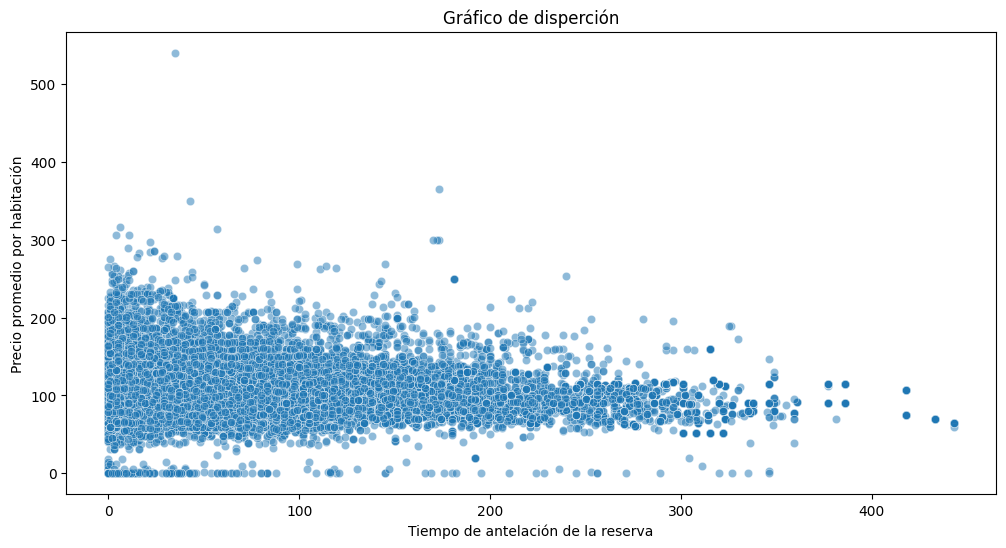

In [96]:
x = X_train['lead_time']
y = X_train['avg_price_per_room']

plt.figure(figsize=(12, 6))
sns.scatterplot(x=x, y=y, alpha=0.5)
plt.title('Gráfico de disperción')
plt.xlabel('Tiempo de antelación de la reserva')
plt.ylabel('Precio promedio por habitación')

correlation = x.corr(y)
print(f"Coeficiente de correlación: {correlation}")

plt.show()

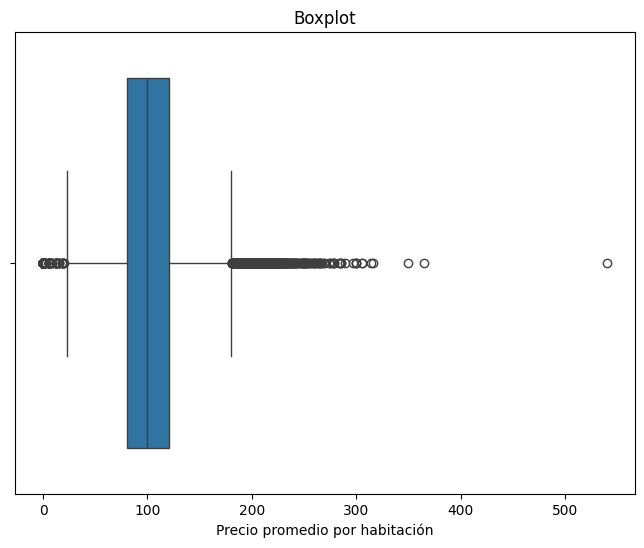

Número de valores atípicos: 1175
Ejemplos de valores atípicos:
14414    199.3
11392      0.0
22979    197.0
8370     194.0
10122      0.0
Name: avg_price_per_room, dtype: float64


In [97]:
variable = 'avg_price_per_room'

plt.figure(figsize=(8, 6))
sns.boxplot(data=X_train, x=variable)
plt.title('Boxplot')
plt.xlabel('Precio promedio por habitación')

plt.show()

# Calcular valores atípicos
q1 = X_train[variable].quantile(0.25)
q3 = X_train[variable].quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

outliers = X_train[(X_train[variable] < limite_inferior) | (X_train[variable] > limite_superior)]

print(f"Número de valores atípicos: {len(outliers)}")
print("Ejemplos de valores atípicos:")
print(outliers[variable].head())

El bloxpot indica que los precios de las habitaciones varían considerablemente, con varios valores atípicos en el extremo superior, lo que podría estar asociado a habitaciones de lujo o precios en temporadas altas. Además, el sesgo hacia precios altos sugiere que algunos clientes pagan tarifas significativamente más altas que la mayoría, lo que podría influir en el comportamiento de cancelación.

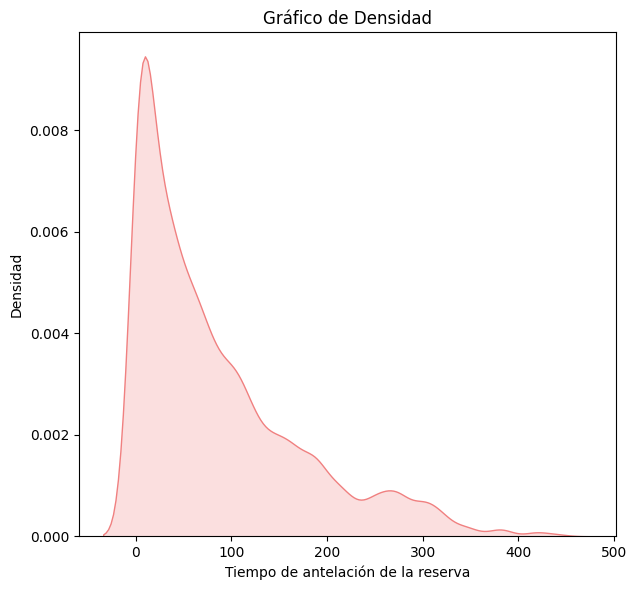

In [93]:
variable = 'lead_time'

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
sns.kdeplot(data=X_train, x=variable, fill=True, color='lightcoral')
plt.title('Gráfico de Densidad')
plt.xlabel('Tiempo de antelación de la reserva')
plt.ylabel('Densidad')

plt.tight_layout()
plt.show()


la distribución es asimétrica negativa, esto implica que la mayoría de las reservas se realizan con mucha antelación, y solo unas pocas se hacen con poco tiempo de anticipación.
Esto podría señalar un tipo de cliente que planea sus estadías con anticipación, lo cual podría estar correlacionado con una menor probabilidad de cancelación.

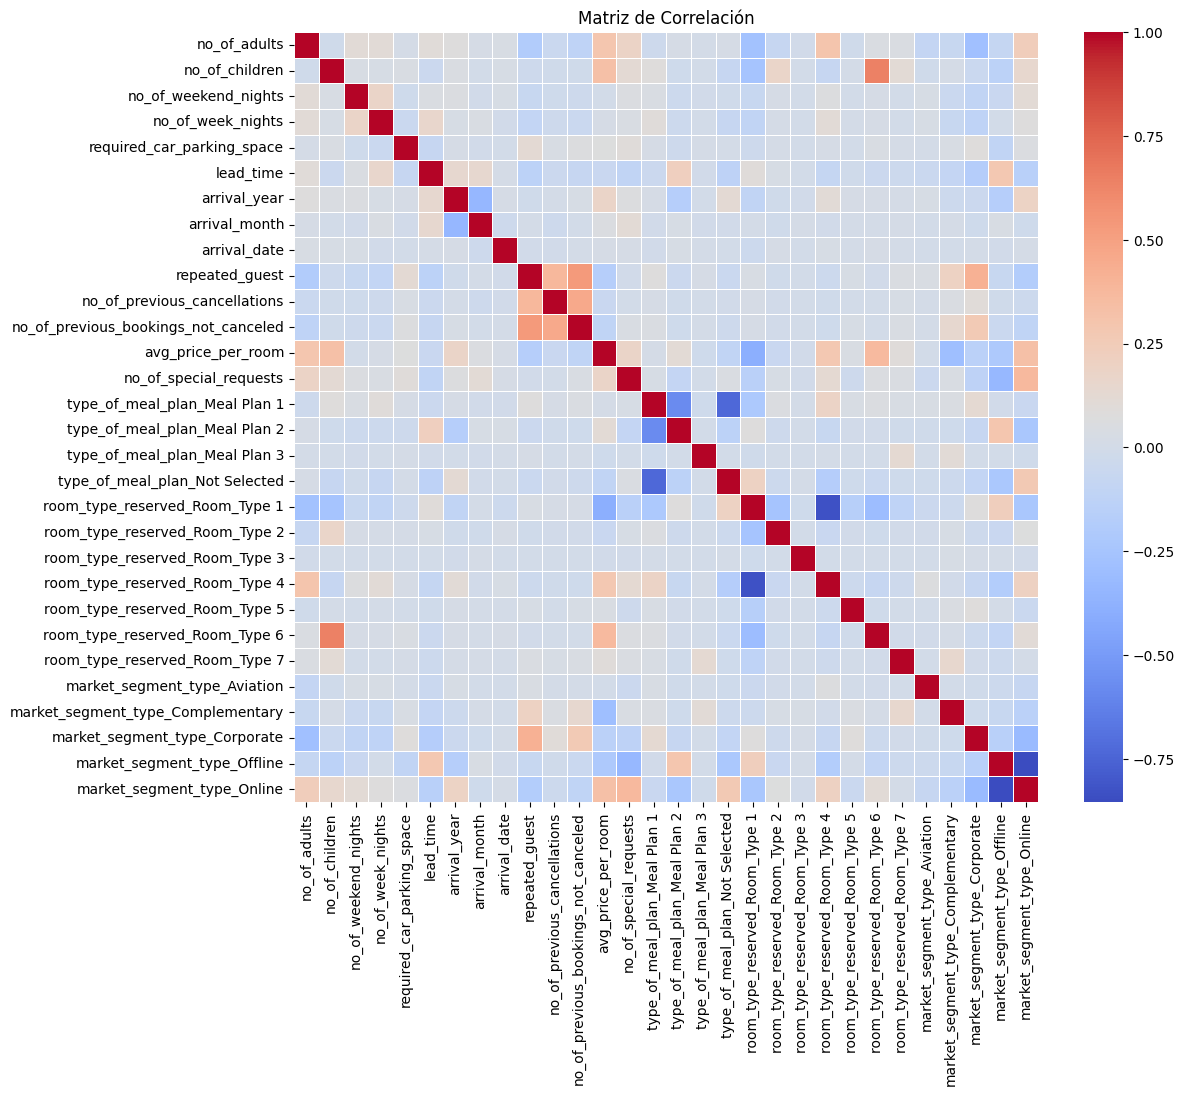

In [104]:
plt.figure(figsize=(12, 10))
correlation_matrix = X_train.corr()
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()
